<a href="https://colab.research.google.com/github/tensorflow-project/FineTuning/blob/main/Experiments/Results/Images/different_seed_4datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
get_ipython().system('pip install -q git+https://github.com/keras-team/keras-cv.git')
get_ipython().system('pip install -q tensorflow==2.11.0')
get_ipython().system('pip install pyyaml h5py')

In [ ]:
!git clone https://github.com/tensorflow-project/FineTuning

Cloning into 'FineTuning'...
remote: Enumerating objects: 1880, done.
remote: Counting objects: 100% (843/843), done.
remote: Compressing objects: 100% (362/362), done.
remote: Total 1880 (delta 621), reused 655 (delta 476), pack-reused 1037
Receiving objects: 100% (1880/1880), 127.23 MiB | 15.39 MiB/s, done.
Resolving deltas: 100% (1340/1340), done.


In [ ]:
import sys
import os
import numpy as np
from google.colab import drive
import urllib.request

drive.mount("/content/drive")

py_file_location = "/content/FineTuning/four_emotions"
sys.path.append(os.path.abspath(py_file_location))
py_file_location = "/content/FineTuning/models"
sys.path.append(os.path.abspath(py_file_location))

import textual_inversion_four_emotions as txt

Mounted at /content/drive
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
### load stable diffusion class and placeholder token from textual_inversion.py
stable_diffusion = txt.StableDiffusion()
placeholder_token = "<my-broccoli-token>"
txt.adding_token(stable_diffusion, placeholder_token)

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE
492466864/492466864 [==============================] - 6s 0us/step


In [ ]:
### for downloading weights from dropbox:
### if you want to use any other service than dropbox, change the code underneath
### Replace  and  with the ID and name of your file

### The file id is the string of characters between "s/" and the next slash "/"
### example: https://www.dropbox.com/s/28lsilu4rltrioj/LR5weightsAllEmotions30epochs.npy?dl=0
file_id = '28lsilu4rltrioj'

### name óf file
file_name = 'LR5weightsAllEmotions40epochs.npy'

url = f'https://www.dropbox.com/s/{file_id}/{file_name}?dl=1'
filename = f'{file_name}.npy'
     


In [ ]:
### Download the file from the URL and save it locally
urllib.request.urlretrieve(url, filename=filename)

### Load the saved numpy file using numpy.load()
weights = np.load(filename, allow_pickle=True)

### Set the weights of the text encoder
stable_diffusion.text_encoder.set_weights(weights)

In [ ]:
### insert your prompt here
prompt = f"a happy {placeholder_token}."
### choose how many images should be generated
number = 1


We generate images for the seeds 1,2,4,8 and 16 to compare the results of our three methods for generating (with 4 datasets, 2 Concepts and Interpolation
)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


198180272/198180272 [==============================] - 2s 0us/step


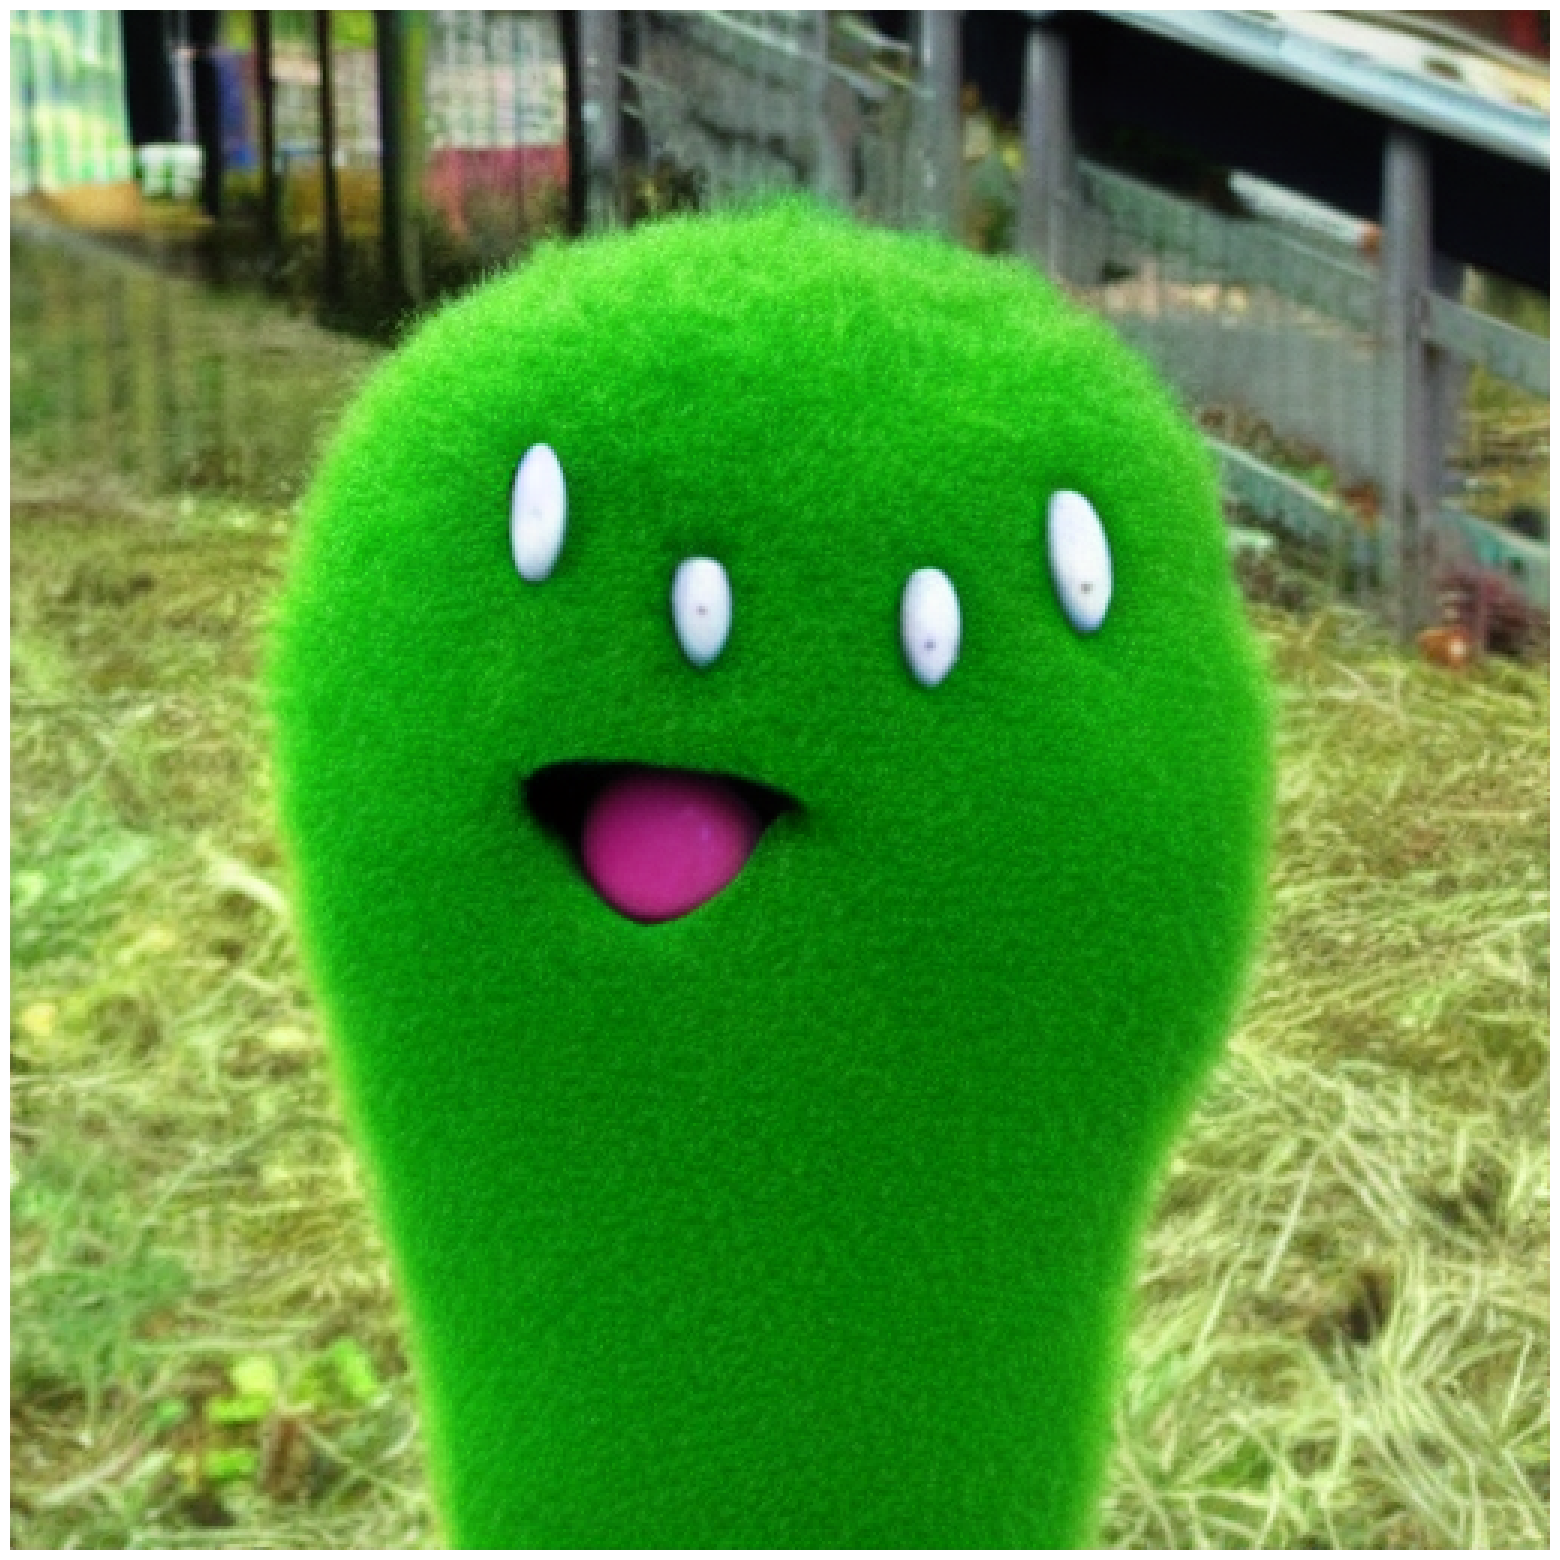

In [ ]:
generated = stable_diffusion.text_to_image(
    prompt , batch_size=number, num_steps=30, seed=1
)
txt.plot_images(generated)

31/31 [==============================] - 36s 1s/step


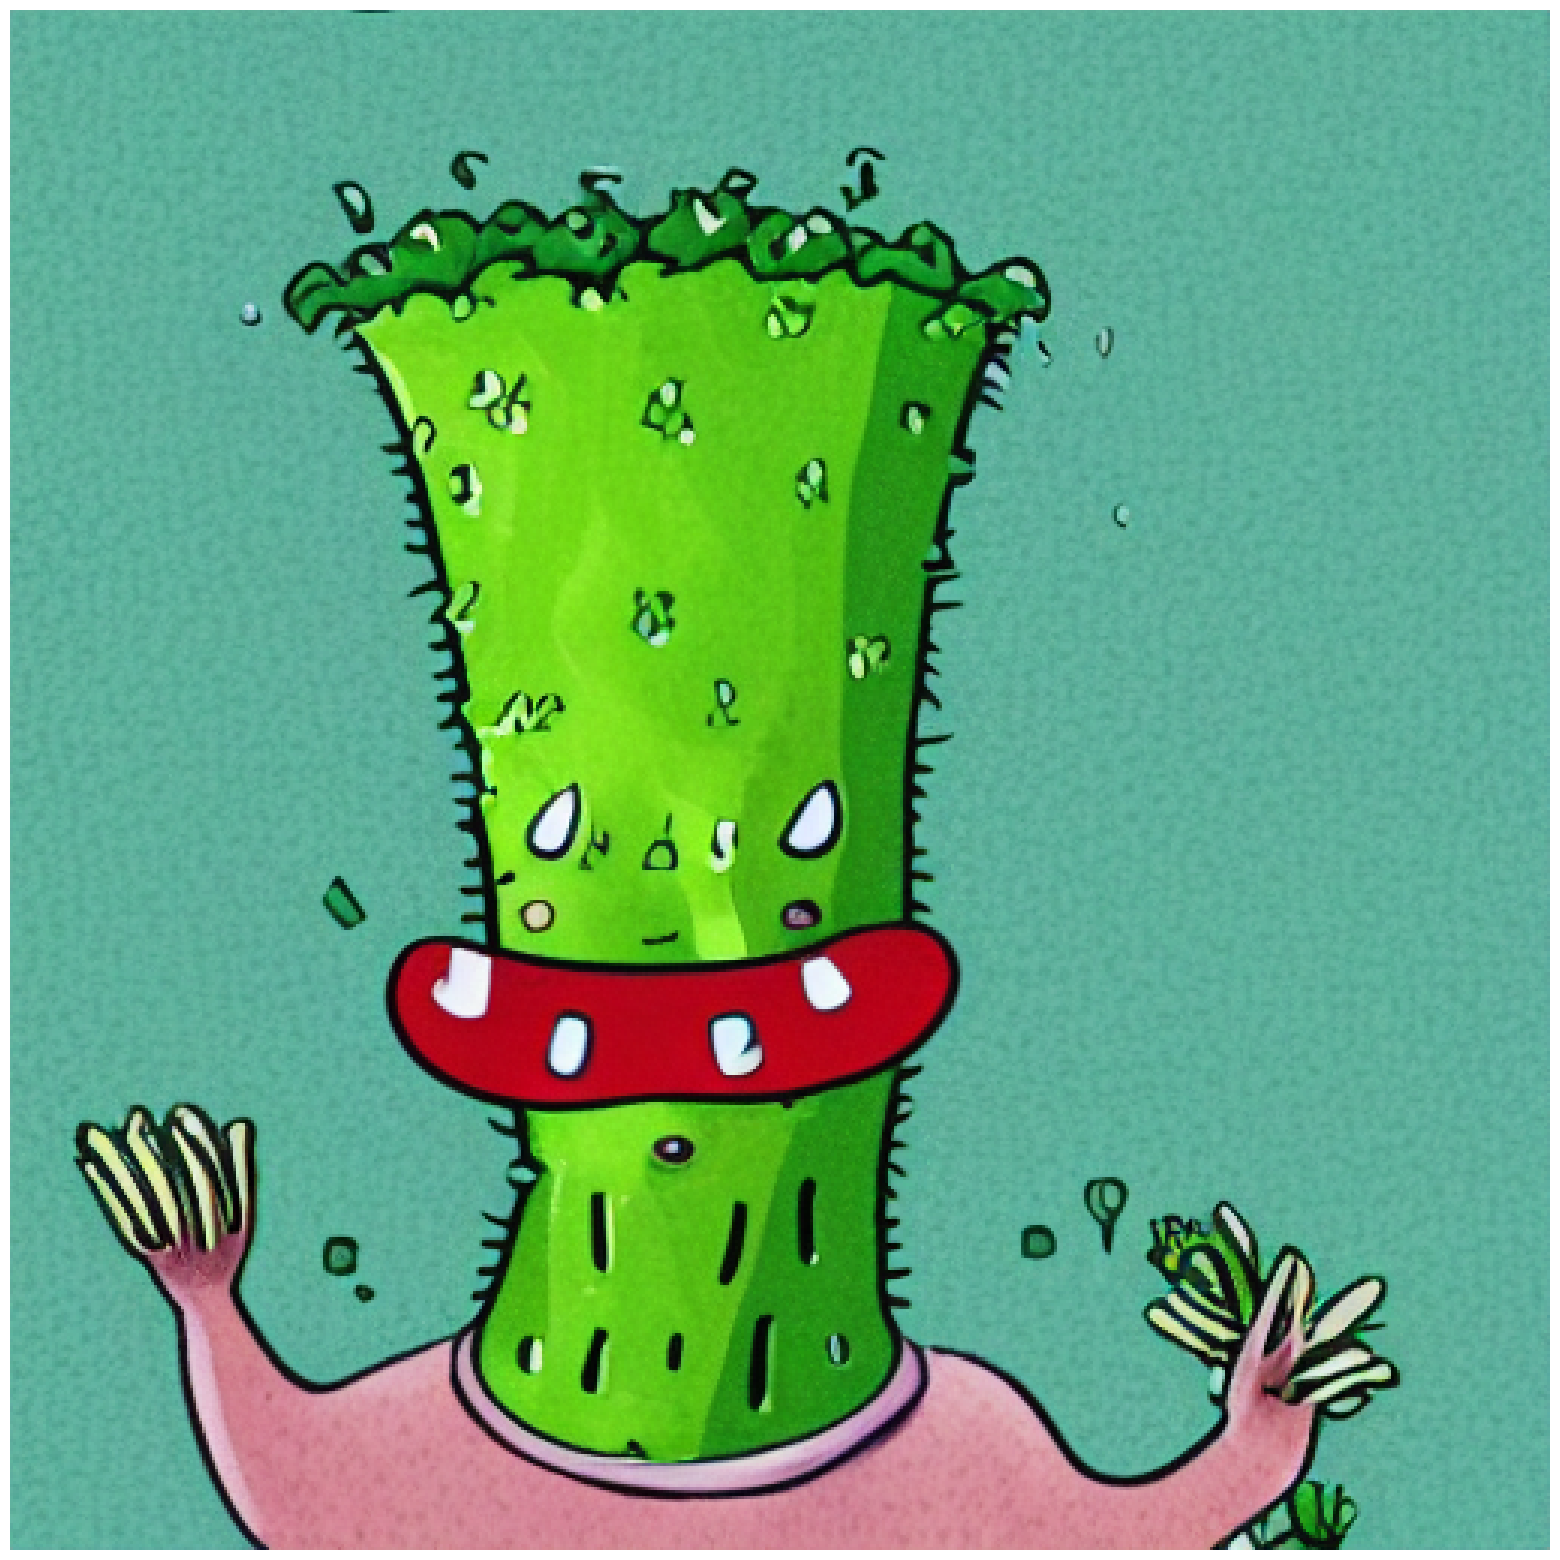

In [ ]:
generated = stable_diffusion.text_to_image(
    prompt , batch_size=number, num_steps=30, seed=2
)
txt.plot_images(generated)

31/31 [==============================] - 35s 1s/step


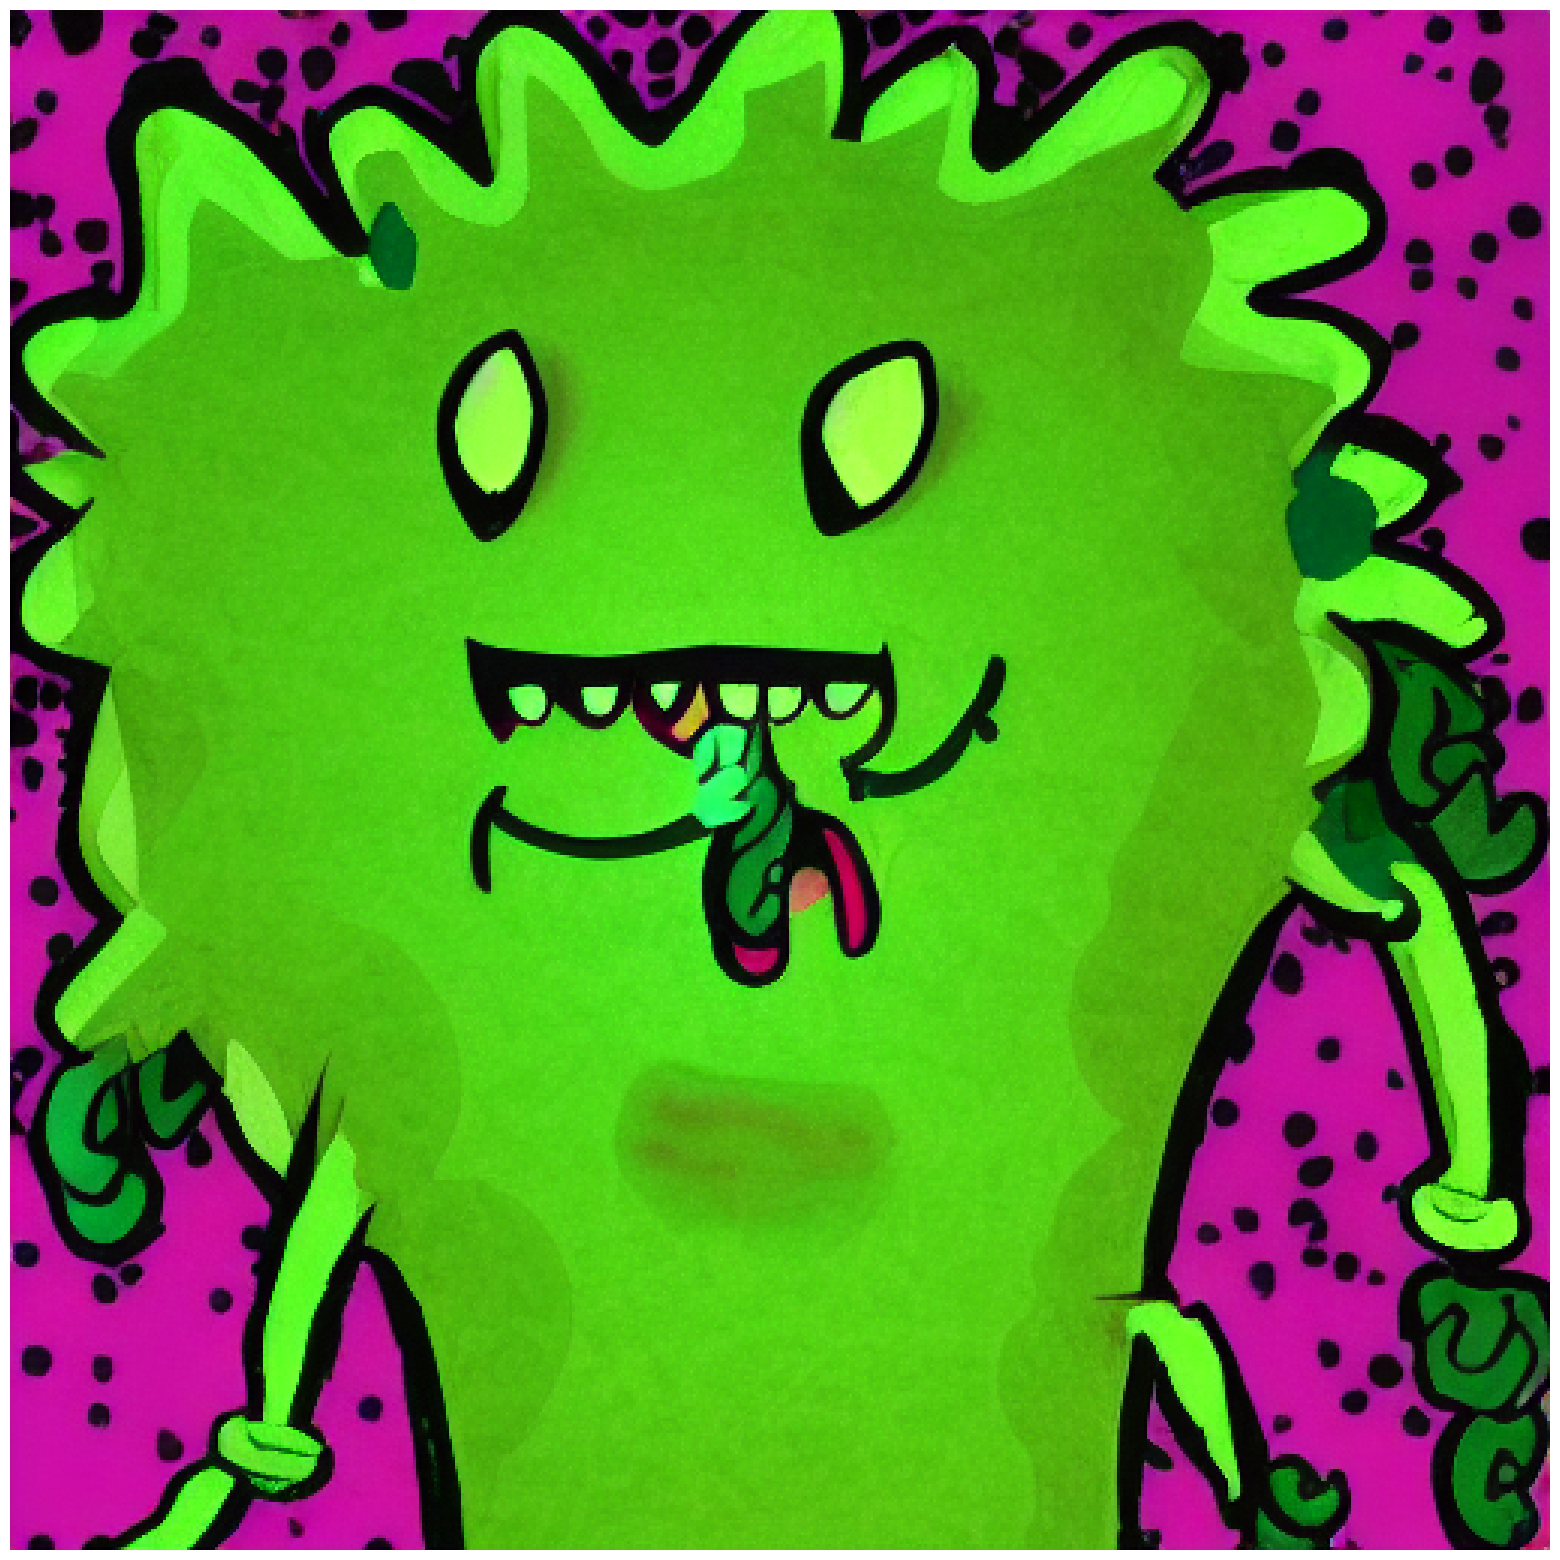

In [ ]:
generated = stable_diffusion.text_to_image(
    prompt , batch_size=number, num_steps=30, seed=4
)
txt.plot_images(generated)

31/31 [==============================] - 35s 1s/step


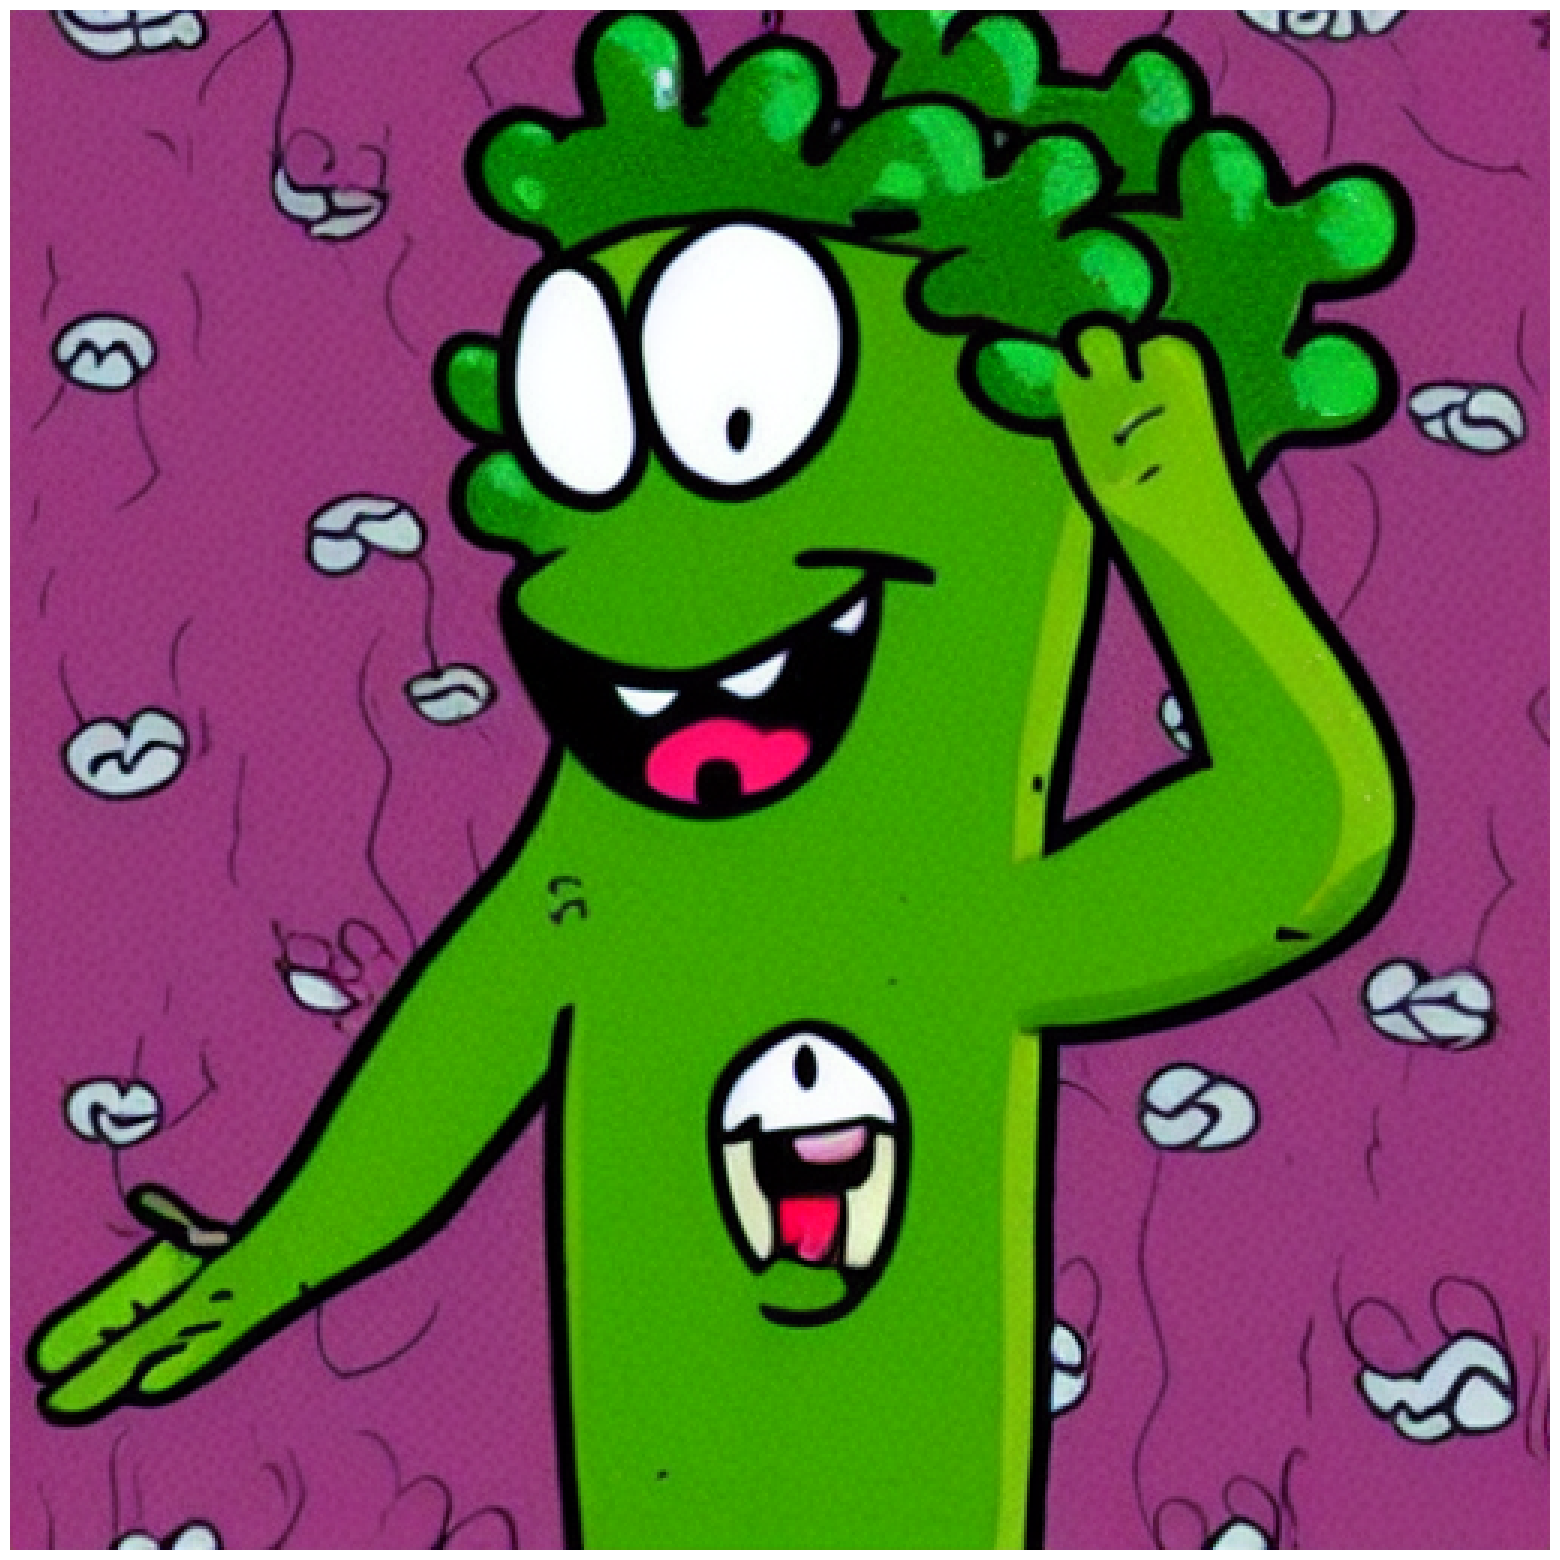

In [ ]:
generated = stable_diffusion.text_to_image(
    prompt , batch_size=number, num_steps=30, seed=8
)
txt.plot_images(generated)

31/31 [==============================] - 35s 1s/step


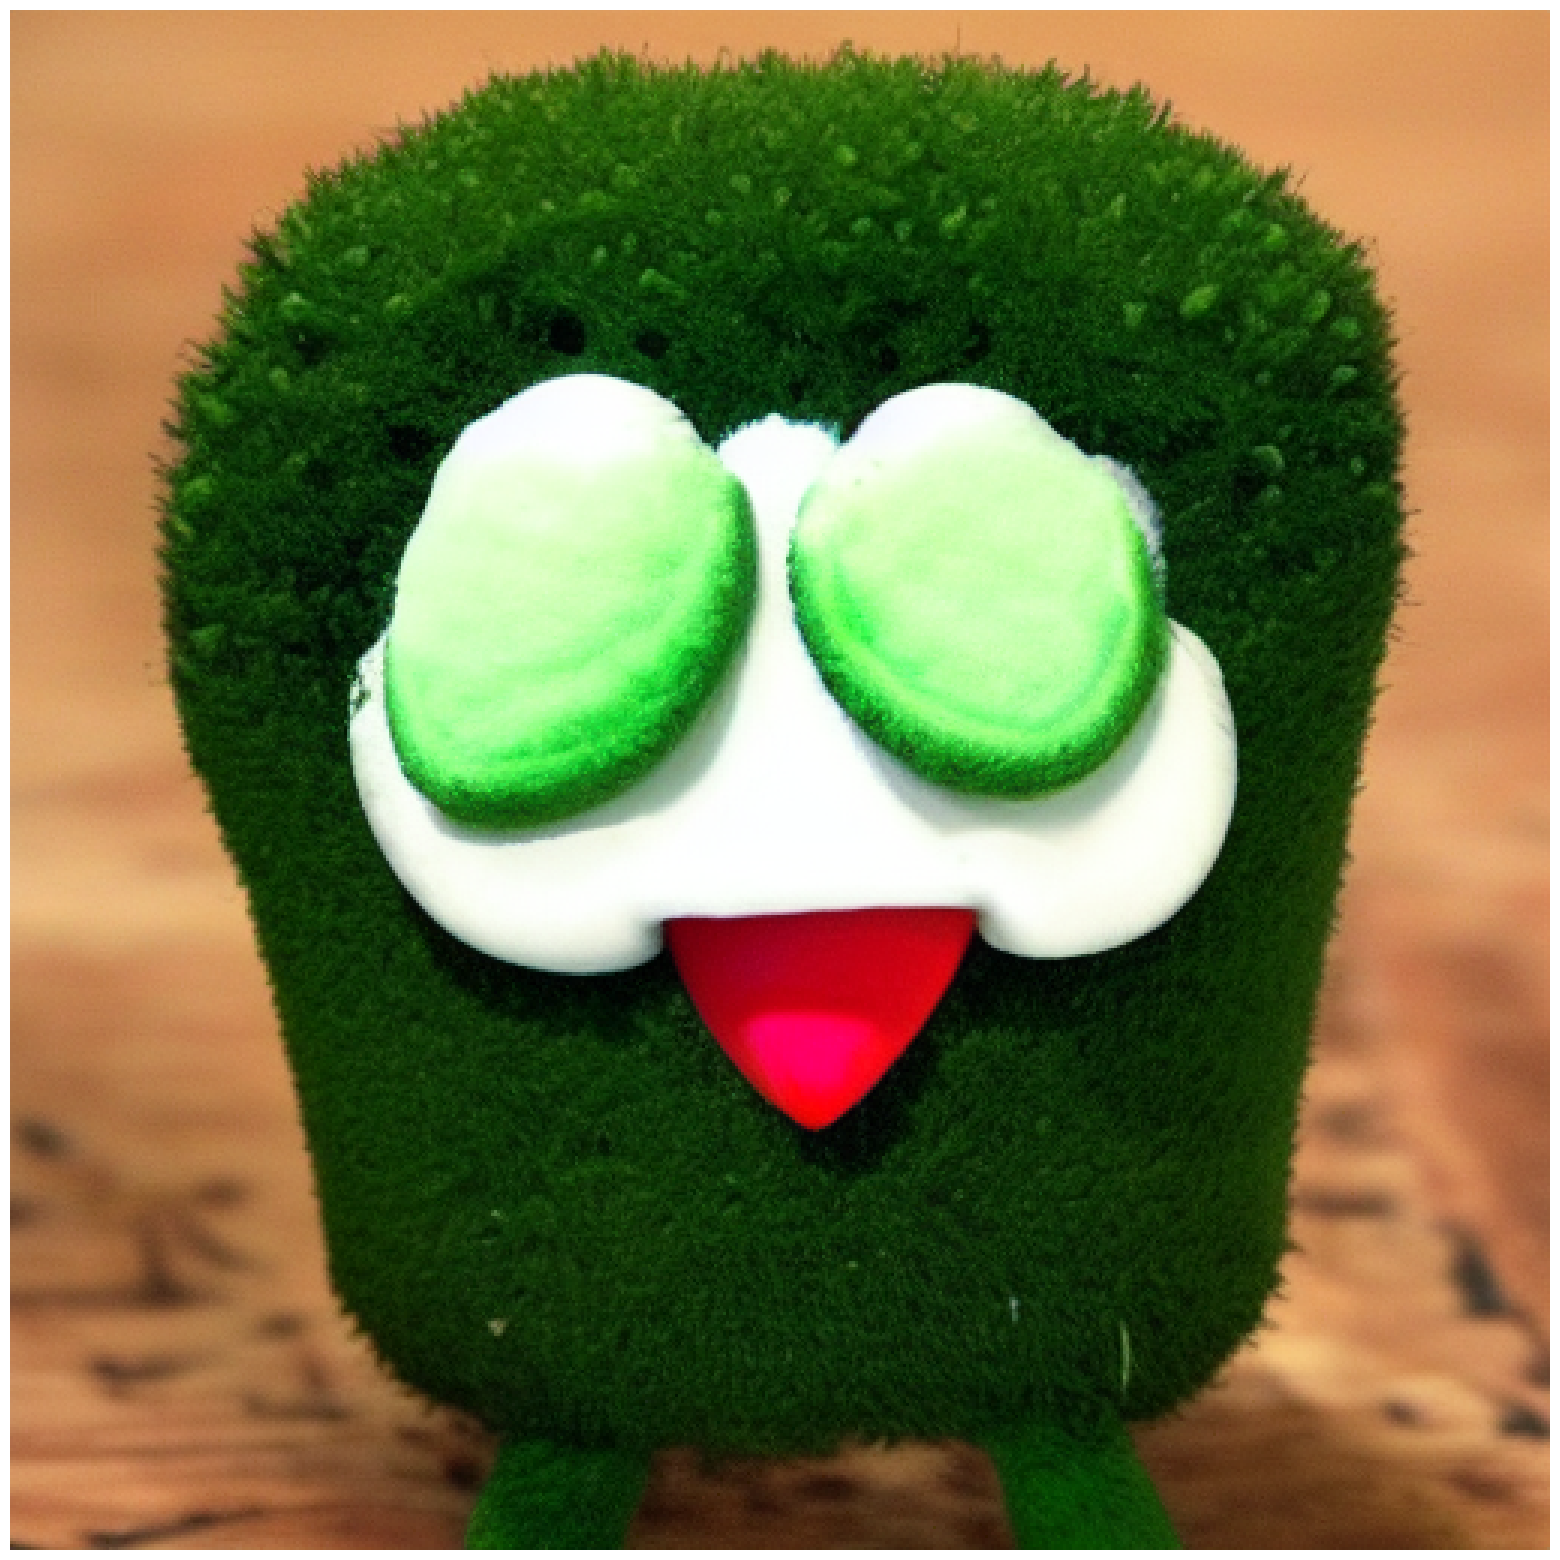

In [ ]:
generated = stable_diffusion.text_to_image(
    prompt , batch_size=number, num_steps=30, seed=16
)
txt.plot_images(generated)

31/31 [==============================] - 35s 1s/step


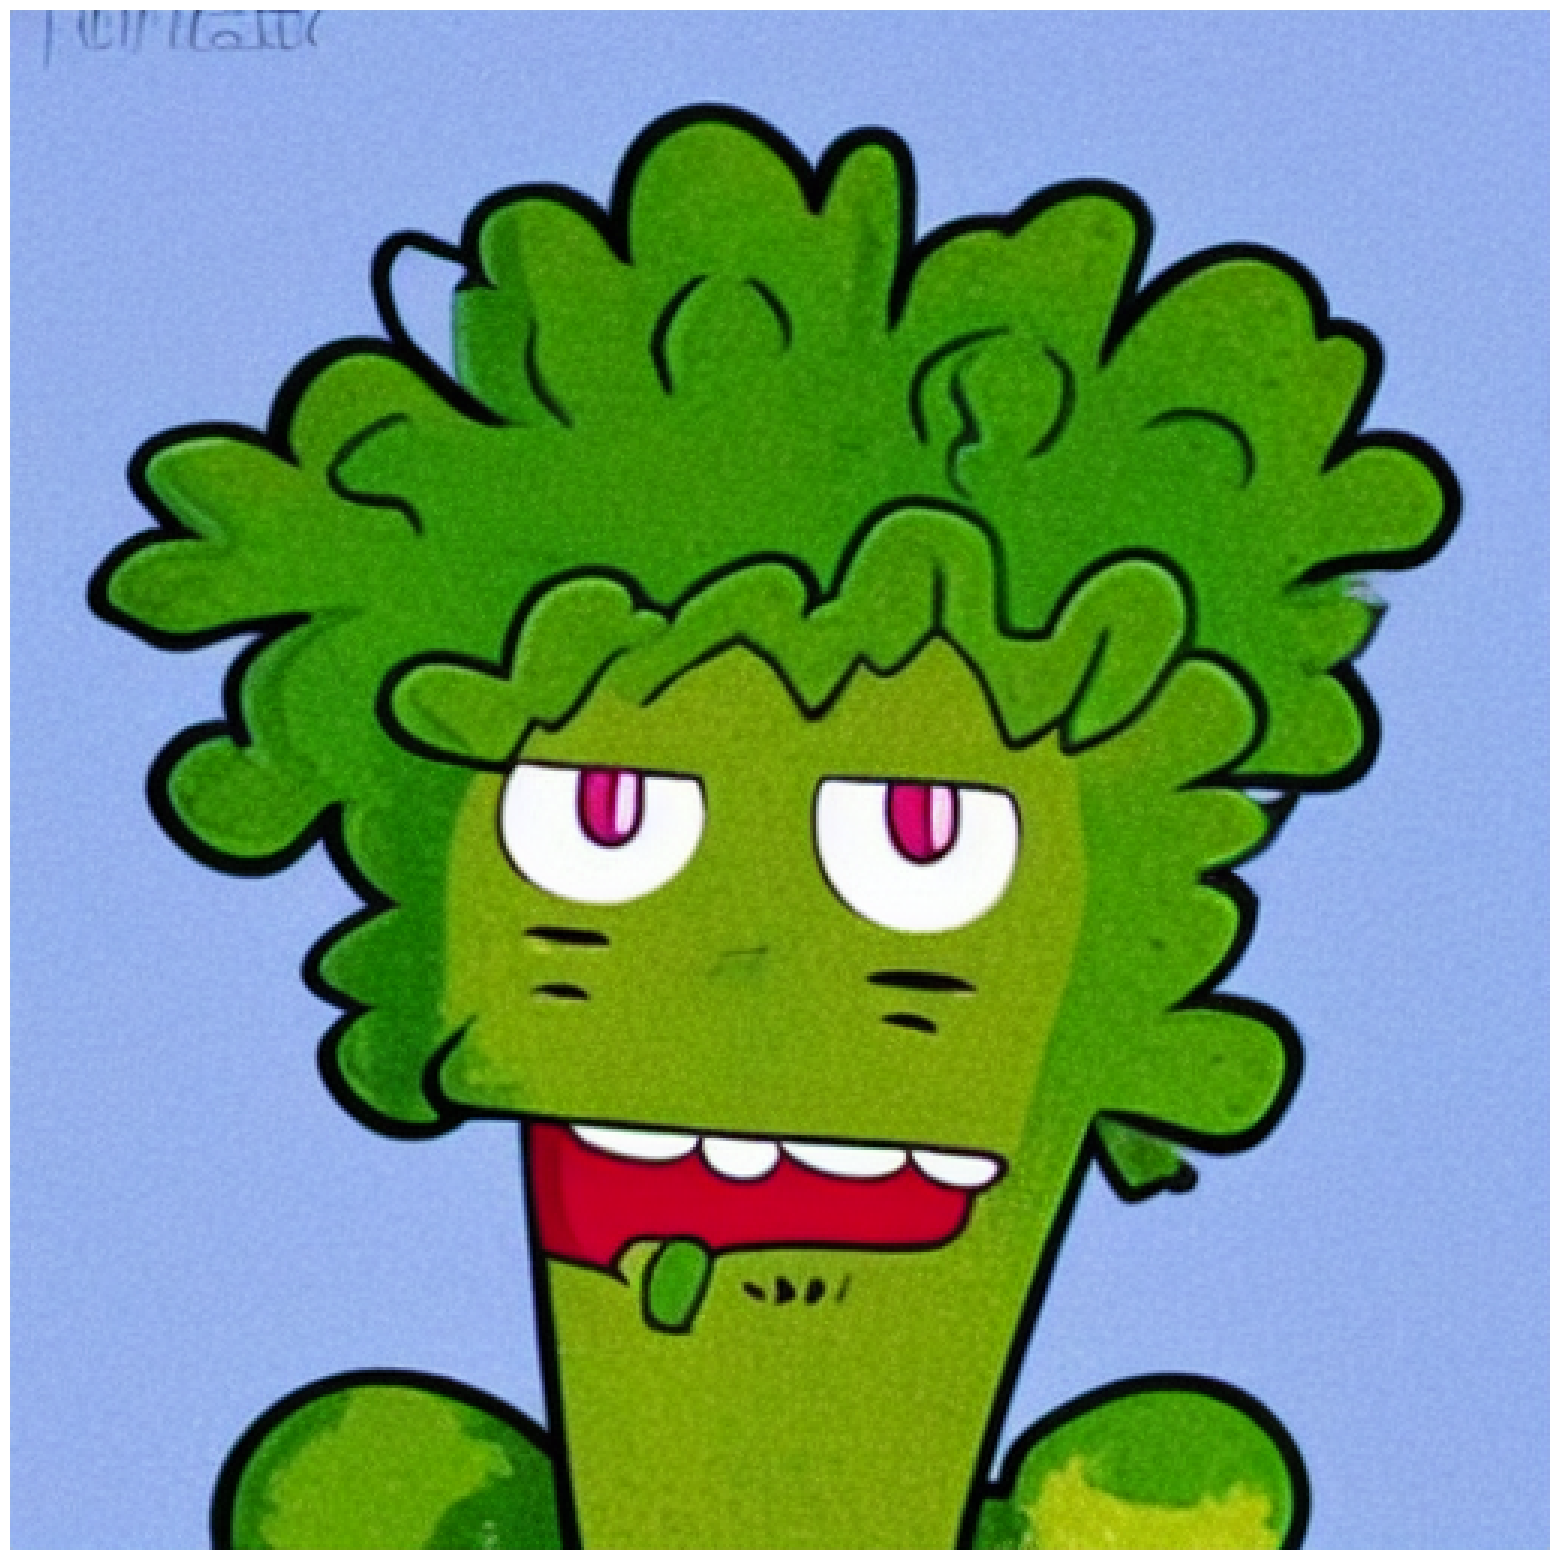

In [ ]:
generated = stable_diffusion.text_to_image(
    prompt , batch_size=number, num_steps=30, seed=32
)
txt.plot_images(generated)

31/31 [==============================] - 35s 1s/step


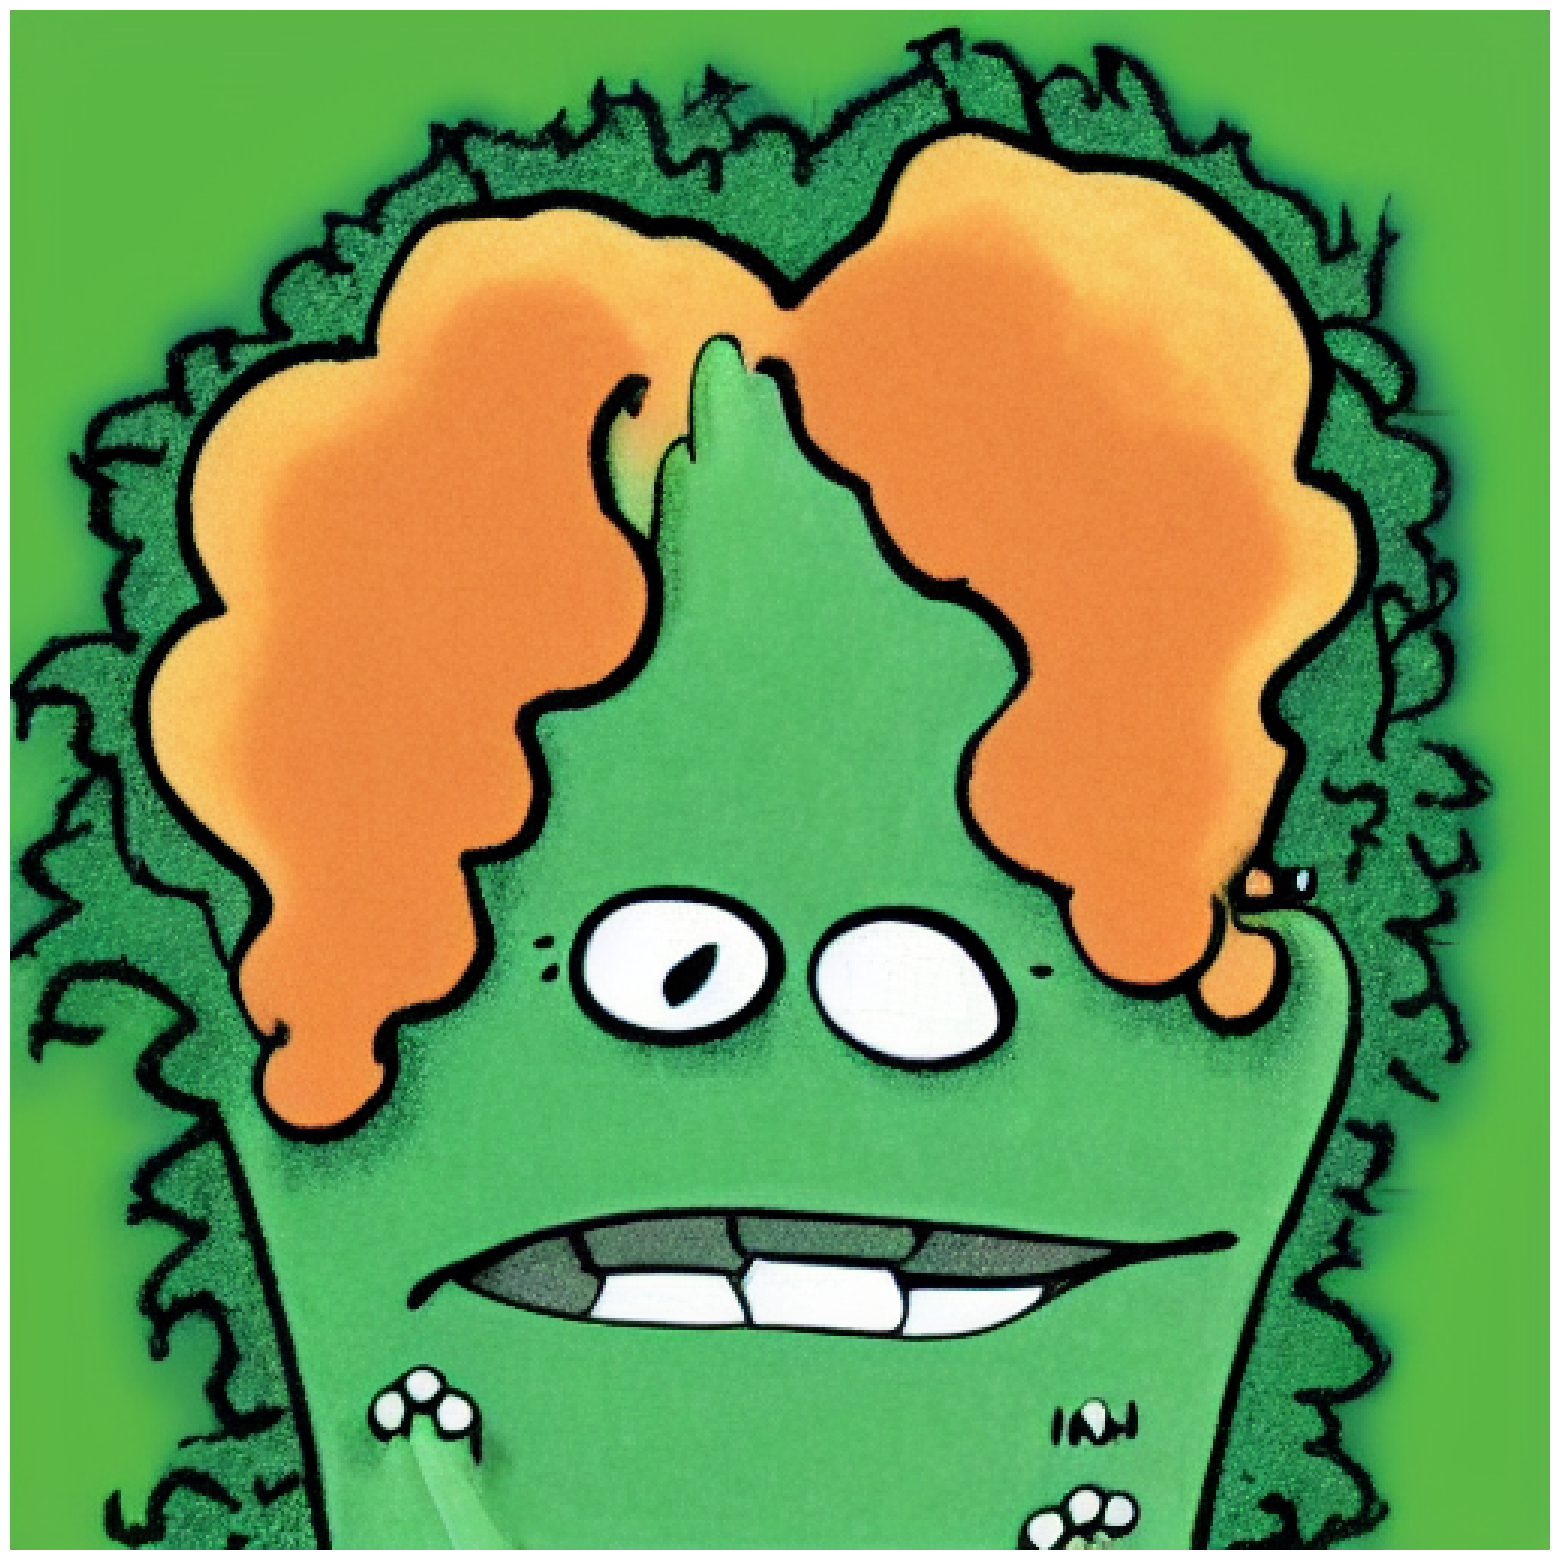

In [ ]:
generated = stable_diffusion.text_to_image(
    prompt , batch_size=number, num_steps=30, seed=64
)
txt.plot_images(generated)

31/31 [==============================] - 36s 1s/step


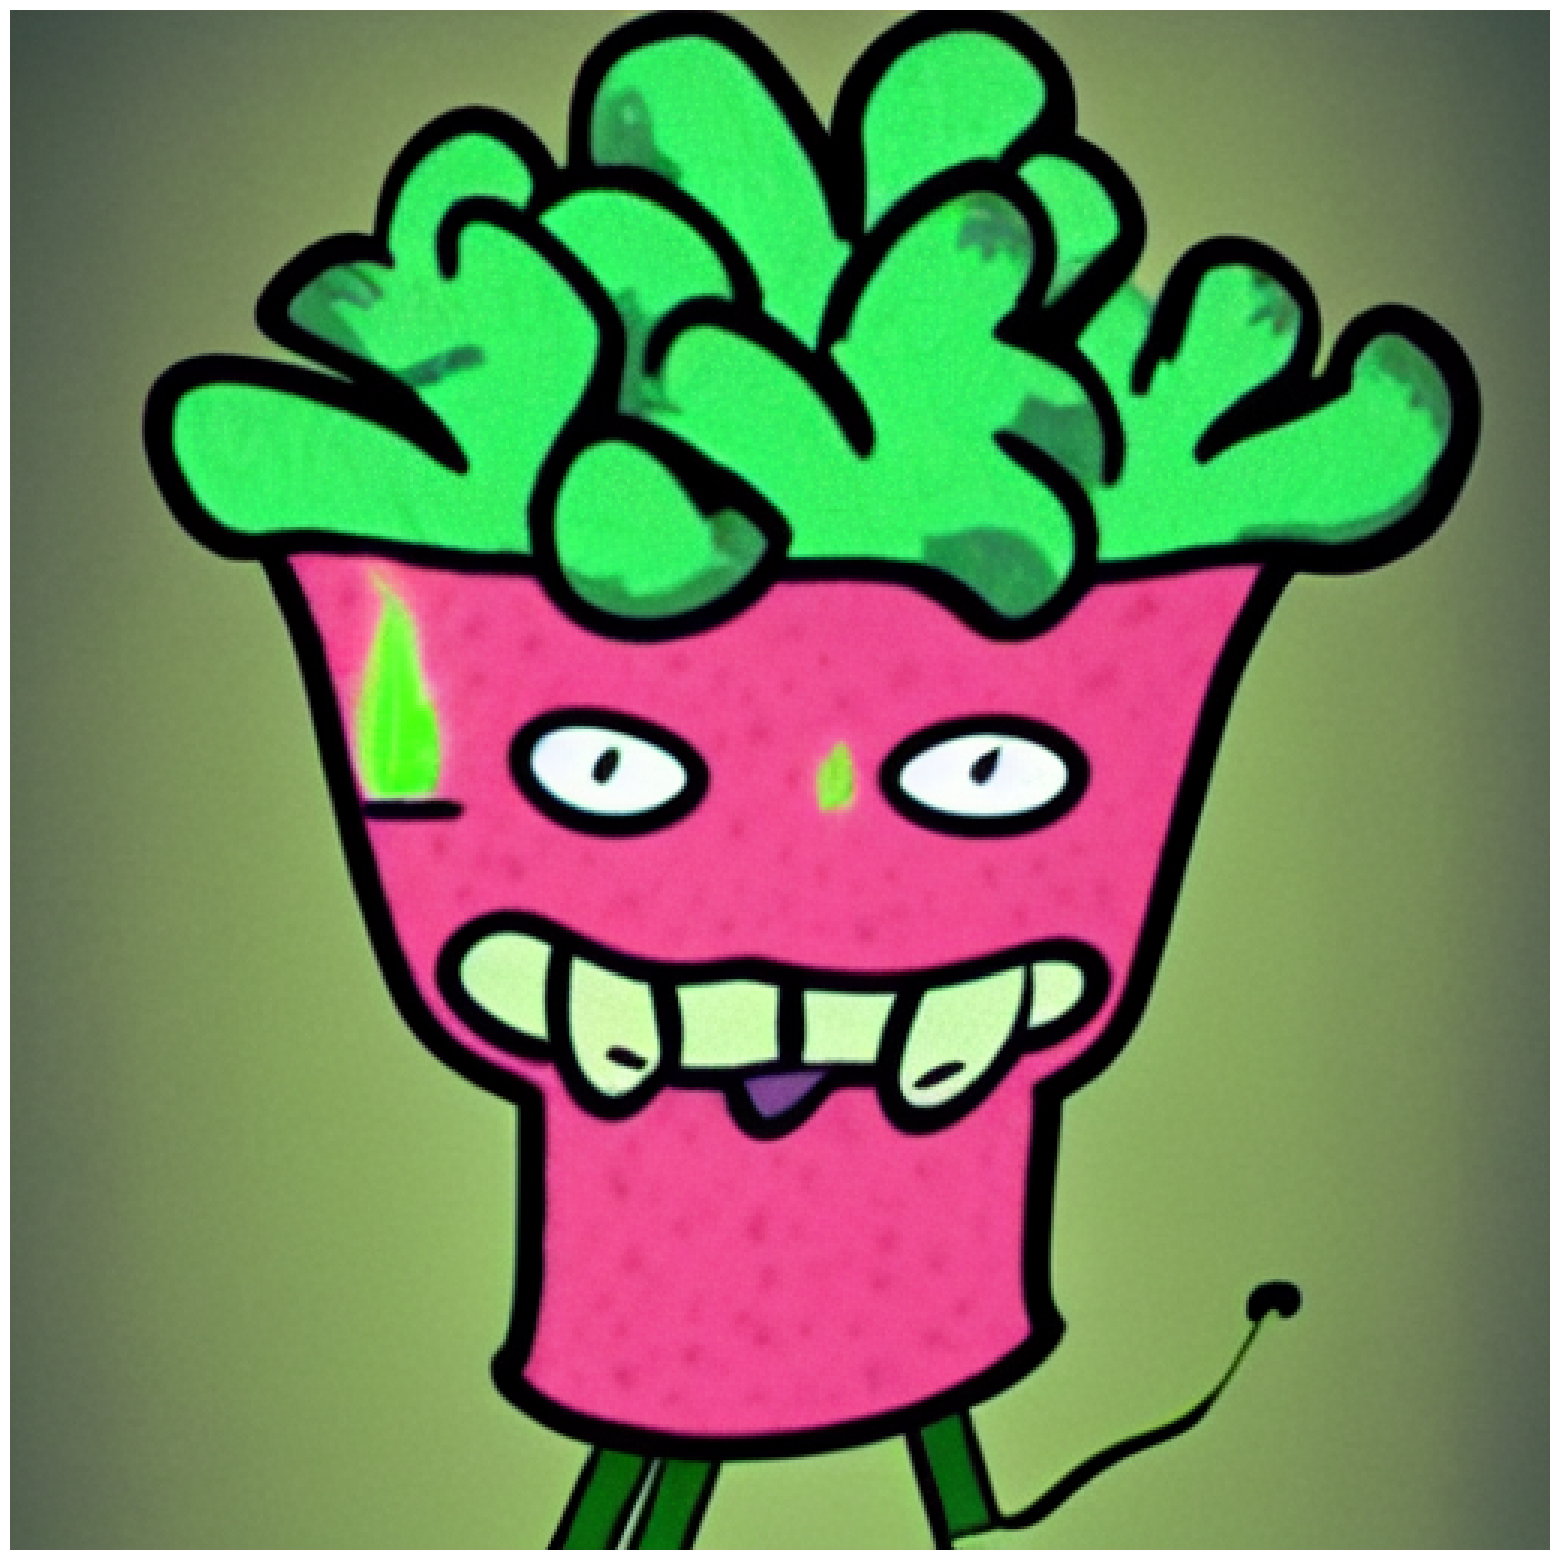

In [ ]:
generated = stable_diffusion.text_to_image(
    prompt , batch_size=number, num_steps=30, seed=128
)
txt.plot_images(generated)

31/31 [==============================] - 35s 1s/step


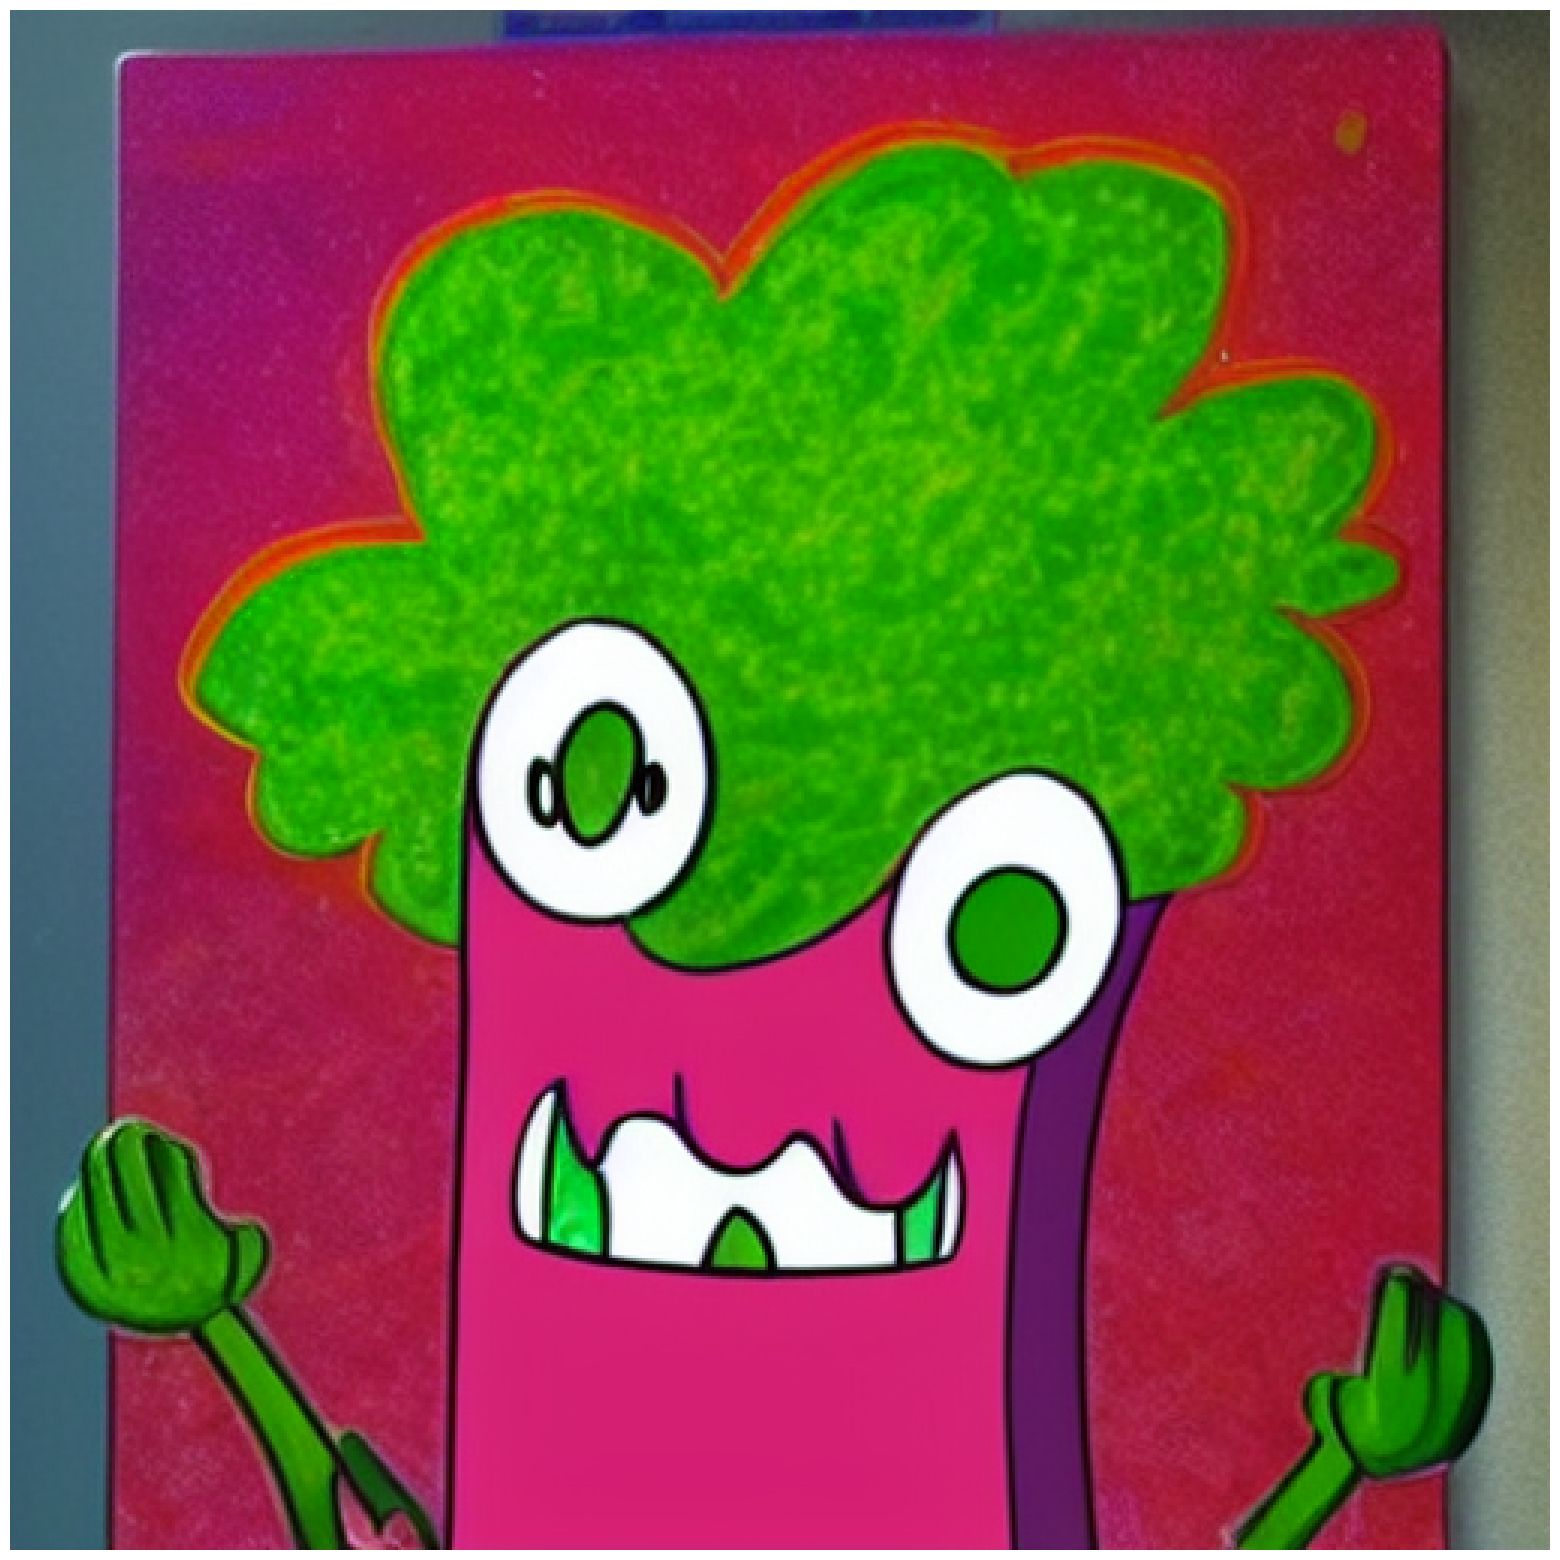

In [ ]:
generated = stable_diffusion.text_to_image(
    prompt , batch_size=number, num_steps=30, seed=256
)
txt.plot_images(generated)